In [590]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [591]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Placement.csv')

In [592]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


<AxesSubplot: >

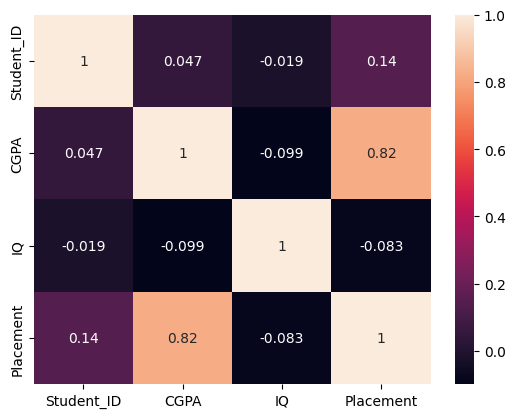

In [593]:
sns.heatmap(df.corr(),annot=True)

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [595]:
df.describe()

,Student_ID,CGPA,IQ,Placement
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,1.000000,3.300000,37.000000,0.000000
25%,25.750000,5.075000,101.500000,0.000000
50%,50.500000,6.000000,127.500000,0.500000
75%,75.250000,6.900000,149.000000,1.000000
max,100.000000,8.500000,233.000000,1.000000


Text(0.5, 1.0, ' SIMPLE PLOT')

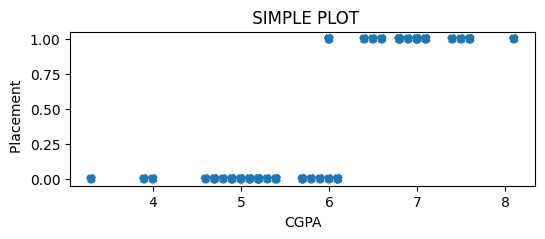

In [596]:
#plot for relation between Income and Loan
df1=df['CGPA'].iloc[:45]
df2=df['Placement'].iloc[:45]

fig = plt.figure(figsize = (6,2))

plt.scatter(df1,df2,marker="o",linestyle="--")
plt.xlabel("CGPA")
plt.ylabel("Placement   ")
plt.title(" SIMPLE PLOT")

Text(0.5, 1.0, ' SIMPLE PLOT')

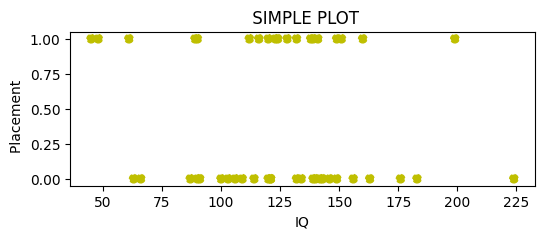

In [597]:
#plot for relation between Income and Loan
df1=df['IQ'].iloc[:45]
df2=df['Placement'].iloc[:45]

fig = plt.figure(figsize = (6,2))

plt.scatter(df1,df2,color='y',marker="o",linestyle="--")
plt.xlabel("IQ")
plt.ylabel("Placement   ")
plt.title(" SIMPLE PLOT")

In [598]:
#defining the columns
df.columns

Index(['Student_ID', 'CGPA', 'IQ', 'Placement'], dtype='object')

In [599]:
#defining the y and x for model
y=df['Placement']
X=df[['Student_ID', 'CGPA', 'IQ']]
X.shape,y.shape

((100, 3), (100,))

In [600]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.667,random_state=2529)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((66, 3), (34, 3), (66,), (34,))

In [601]:
#select model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [602]:
#training the model
model.fit(X_train,y_train)

LogisticRegression()

In [603]:
#prediction from trained model
y_pred=model.predict(X_test)

In [604]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# model accuracy
accuracy_score(y_test,y_pred)

0.9411764705882353

In [605]:
#classifiaction report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.90      0.95        20

    accuracy                           0.94        34
   macro avg       0.94      0.95      0.94        34
weighted avg       0.95      0.94      0.94        34



In [606]:
# select model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [607]:
# train model
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [608]:
# predict with model
y_pred=model.predict(X_test)

In [609]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [610]:
# model accuracy
accuracy_score(y_test,y_pred)

0.9411764705882353

In [611]:
# model confusion matrix
confusion_matrix(y_test,y_pred)

array([[14,  0],
       [ 2, 18]], dtype=int64)

In [612]:
#selecting model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

In [613]:
#training model
clf.fit(X_train,y_train)

RandomForestClassifier()

In [614]:
#making prediction
y_pred=clf.predict(X_test)

In [615]:
#model evaluation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9117647058823529


In [616]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df)

In [617]:
#selecting model
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df)
df.insert(df.columns.get_loc("CGPA"), "Cluster", clusters)
df.head(3)

C:\Users\ANKIT DHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Student_ID,Cluster,CGPA,IQ,Placement
0,1,0,6.8,123,1
1,2,0,5.9,106,0
2,3,0,5.3,121,0


In [618]:
#making predictions
y_pred=clf.predict(X_test)

In [619]:
#accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9117647058823529


C:\Users\ANKIT DHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ANKIT DHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ANKIT DHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ANKIT DHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

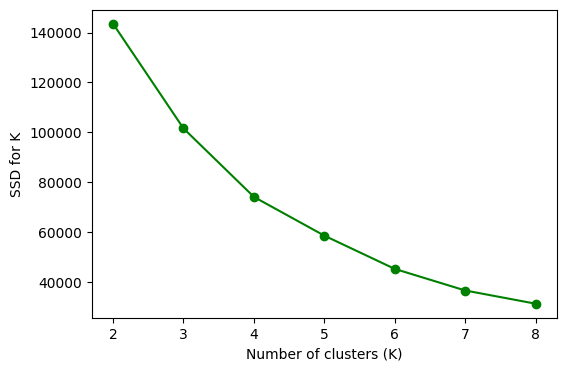

In [620]:
#finding ideal number of clustures
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="green", marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [621]:
#finding unique clustures
df.Cluster.unique()

array([0, 1, 2])

In [622]:
#selecting model
from sklearn import svm
clf = svm.SVC(kernel='linear') #Linear Kernel

In [623]:
#trainig the model
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [624]:
#making predictions
y_pred = clf.predict(X_test)

In [625]:
#from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100," %")

Accuracy: 94.11764705882352  %


In [626]:
#precession
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 1.0


In [627]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9


In [628]:
#Naive Bayes
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
placement_encoded=le.fit_transform(df['Placement'])
print (placement_encoded)

[1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


In [629]:
cgpa_encoded=le.fit_transform(df['CGPA'])
print("CGPA : ",  cgpa_encoded)
iq_encoded=le.fit_transform(df['IQ'])
print("IQ : ",iq_encoded)

CGPA :  [26 17 13 31 16 29 15 10 19 11 18 27 14 22 19 11 12  0  3 12 24 29  9  7
  7 10 28 18 12 28 33  2 28 18  8 26 15 36 23  6  9 14 33 26 32 18 13 12
 24 14  1  8 28 37 22 34 19 23 35  8 27 30 18 21 28 36 27 10  3 38 21 19
 30  9 25  8  9 30 19 23  9 14 23 32 15 16 11 15  5  9 30 32 12 26  7  4
  5 25 21 20]
IQ :  [34 23 33 39 47  3 48  7 54 10  2 43 44 30 22 63 69 65 20 39 32 51 32 15
 33 18 67 35 17 27 37 25 44 50 58 17 45 50 56 49 40 29 16 46  6 10 29 57
 43 41 70 46 62 60 46 29  9 38 12 27 44 42 21 37  8 59 19 31 11 32 36 39
 30  6 52 61 53  4 13 17 66 24  0 38 61 59 37 39 50 51 14 55 26 27  5 68
  1 64 22 28]


In [630]:
features=zip(iq_encoded,cgpa_encoded)
print(features)

In [631]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(X_test) 
print("Predicted Value:", predicted)

Predicted Value: [1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0]


In [632]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9411764705882353


In [633]:
# define X_new
X_new=df[['Student_ID','CGPA', 'IQ']].loc[3, :]
(X_new)

Student_ID      4.0
CGPA            7.4
IQ            132.0
Name: 3, dtype: float64

In [634]:
#predicting the result for new values of X
model.predict(X_new.to_numpy().reshape(1,-1))

C:\Users\ANKIT DHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Text(0.5, 1.0, 'Placment VS CGPA')

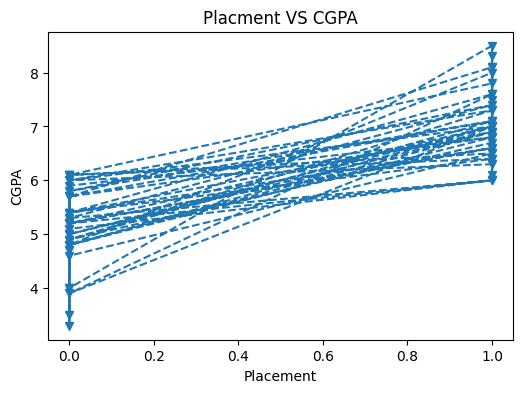

In [635]:
#plot for Placement and CGPA
df1=df['Placement'].iloc[:75]
df2=df['CGPA'].iloc[:75]

fig = plt.figure(figsize = (6, 4))

plt.plot(df1,df2,marker="v",linestyle="--")
plt.xlabel("Placement")
plt.ylabel("CGPA")
plt.title("Placment VS CGPA")

Text(0.5, 1.0, 'Placment VS IQ')

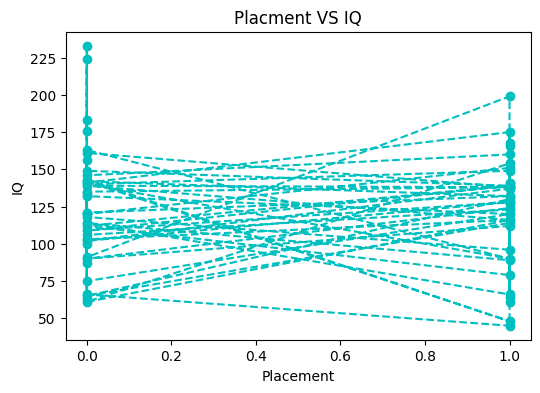

In [636]:
#plot for Placement and IQ

df1=df['Placement'].iloc[:75]
df2=df['IQ'].iloc[:75]

fig = plt.figure(figsize = (6, 4))

plt.plot(df1,df2,color="c",marker="o",linestyle="--")
plt.xlabel("Placement")
plt.ylabel("IQ")
plt.title("Placment VS IQ")

Text(0.5, 1.0, 'CGPA VS IQ')

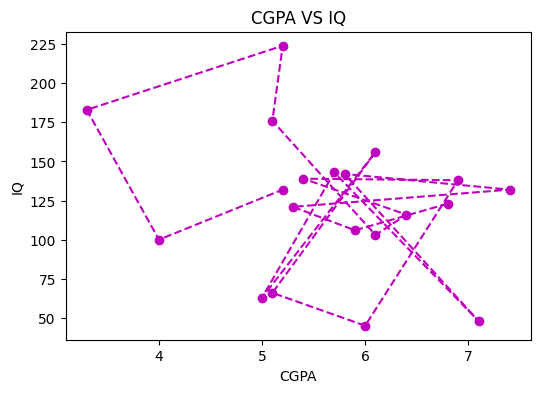

In [637]:
#plot for IQ and CGPA

df1=df['CGPA'].iloc[:20]
df2=df['IQ'].iloc[:20]

fig = plt.figure(figsize = (6, 4))

plt.plot(df1,df2,color="m",marker="o",linestyle="--")
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.title("CGPA VS IQ")

In [638]:
#Calculationg the ratio
df["academic_ratio"] = df["CGPA"]/df["IQ"]

Text(0.5, 1.0, 'Placement VS academic_ratio')

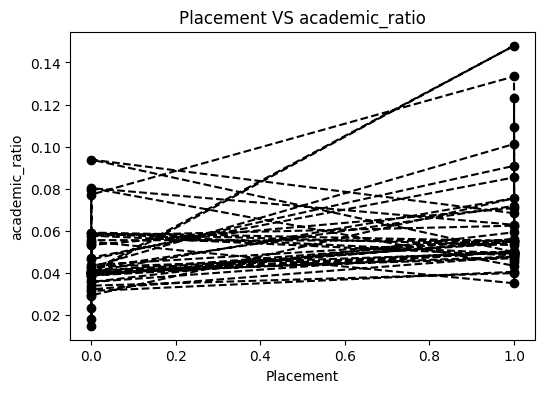

In [639]:
#plot for Placement and academic_ratio

df1=df['Placement'].iloc[:75]
df2=df['academic_ratio'].iloc[:75]

fig = plt.figure(figsize = (6, 4))

plt.plot(df1,df2,color="k",marker="o",linestyle="--")
plt.xlabel("Placement")
plt.ylabel("academic_ratio")
plt.title("Placement VS academic_ratio")

In [640]:
#creating the unique placement id for students
placement_id=[int(f"100{i}") for i in range(100)]

In [641]:
#shuffelig the placement_ids'
import random 
random.shuffle(placement_id)
#placement_id

In [642]:
#adding the placement_id to data frame
df["placement_id"]=placement_id
df.set_index("placement_id",inplace=True)
df.head()

,Student_ID,Cluster,CGPA,IQ,Placement,academic_ratio
placement_id,,,,,,
1001,1,0,6.8,123,1,0.055285
1008,2,0,5.9,106,0,0.055660
10082,3,0,5.3,121,0,0.043802
10097,4,0,7.4,132,1,0.056061
10043,5,0,5.8,142,0,0.040845


In [643]:
#df.drop(["index","level_0"],axis=1,inplace=True)
#df.reset_index(inplace=True)

In [644]:
#sorting the CGPA
df.sort_values("CGPA",ascending=False,inplace=True)

In [645]:
#Cheaking for changes
df.head()

,Student_ID,Cluster,CGPA,IQ,Placement,academic_ratio
placement_id,,,,,,
10094,70,2,8.5,120,1,0.070833
10058,54,1,8.3,168,1,0.049405
10025,38,1,8.1,149,1,0.054362
10019,66,1,8.1,166,1,0.048795
10089,59,2,8.0,79,1,0.101266


In [646]:
#selecting a the student with maximum academic_ratio
df[["Student_ID","IQ","academic_ratio","Placement"]][df["academic_ratio"]==df["academic_ratio"].max()]

,Student_ID,IQ,academic_ratio,Placement
placement_id,,,,
10052,83,37,0.175676,1


In [647]:
#df["academic_ratio"].mean()
df.describe()

,Student_ID,Cluster,CGPA,IQ,Placement,academic_ratio
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.94000,5.991000,123.580000,0.500000,0.055882
std,29.011492,0.77616,1.143634,39.944198,0.502519,0.028021
min,1.000000,0.00000,3.300000,37.000000,0.000000,0.015021
25%,25.750000,0.00000,5.075000,101.500000,0.000000,0.039856
50%,50.500000,1.00000,6.000000,127.500000,0.500000,0.049007
75%,75.250000,2.00000,6.900000,149.000000,1.000000,0.060827
max,100.000000,2.00000,8.500000,233.000000,1.000000,0.175676


In [648]:
#Inferences from analysis :-

# 1)This a data of 100 students who appeared for placements and they are juged on two parameters CGPA and IQ levle 
# 2)The  CGPA is 5.9910.
# 3)Almost 50% of the students got 6.0000 CGPA.
# 4)Almost 75% of the students got 6.9000 CGPA [AMBIGIOUS].
# 5)50% of the students got placed.
# 6)Having good IQ does not enure a placment.
# 7)Good IQ students are having low CGPA!
# 8)Minimum CGPA to secure a placement is 5.8(approx).
# 9)We created a seperate column with the name as Placement_id to uniquely identify a particular student
#10)From different ML models we run we got to know the Logistic Regession has an accuracy of 0.9411764705882353
#11)From different ML models we run we got to know the Decession Tree Classifier has an accuracy of 0.9411764705882353
#12)From different ML models we run we got to know the Random Forest Classifier has an accuracy of 0.9117647058823529
#13)From different ML models we run we got to know the SVC has an accuracy of 0.9411764705882352 
#14)From different ML models we run we got to know the Naive Bayes has an accuracy of 0.9411764705882353
#15)From different ML models we run we got to know the K-Means has an accuracy of 0.9117647058823529
#16)Hence we can choose either Logistic Regression or Decession Tree Classifier or SVC or Naive Bayes 